# GAN Training

## imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari

Using TensorFlow backend.


In [2]:
RUN_ID = '0035'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
(x_train, y_train) = load_safari('camel')

## architecture

In [4]:
x_train.shape

(80000, 28, 28, 1)

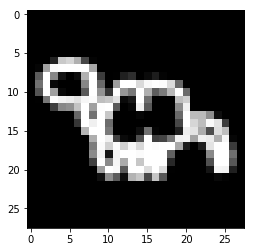

In [5]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray')

In [6]:
np.min(x_train[0])

-1.0

In [7]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = None
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

gan.save(RUN_FOLDER)

In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
discriminator_conv_2 (Conv2D (None, 4, 4, 128)         204928    
_________________________________________________________________
activation_3 (Activation)    (None, 4, 4, 128)         0         
__________

In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 14, 14, 128)       204928    
__________

## training

In [11]:
BATCH_SIZE = 128
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [ ]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = 20000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (0.728)(R 0.690, F 0.767)] [D acc: (0.496)(0.992, 0.000)] [G loss: 0.676] [G acc: 1.000]
1 [D loss: (1.750)(R 0.642, F 2.858)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.671] [G acc: 1.000]
2 [D loss: (0.692)(R 0.668, F 0.716)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.661] [G acc: 1.000]
3 [D loss: (0.705)(R 0.662, F 0.748)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.664] [G acc: 1.000]
4 [D loss: (0.699)(R 0.666, F 0.733)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.666] [G acc: 1.000]
5 [D loss: (0.699)(R 0.668, F 0.731)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.670] [G acc: 1.000]
6 [D loss: (0.699)(R 0.670, F 0.727)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.673] [G acc: 1.000]
7 [D loss: (0.698)(R 0.672, F 0.724)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.675] [G acc: 1.000]
8 [D loss: (0.698)(R 0.674, F 0.722)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.677] [G acc: 1.000]
9 [D loss: (0.697)(R 0.676, F 0.718)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.680] [G acc: 1.000]


82 [D loss: (0.696)(R 0.685, F 0.707)] [D acc: (0.422)(0.844, 0.000)] [G loss: 0.694] [G acc: 0.281]
83 [D loss: (0.692)(R 0.683, F 0.700)] [D acc: (0.500)(0.969, 0.031)] [G loss: 0.694] [G acc: 0.398]
84 [D loss: (0.694)(R 0.681, F 0.706)] [D acc: (0.465)(0.914, 0.016)] [G loss: 0.693] [G acc: 0.406]
85 [D loss: (0.693)(R 0.681, F 0.705)] [D acc: (0.480)(0.945, 0.016)] [G loss: 0.695] [G acc: 0.219]
86 [D loss: (0.694)(R 0.680, F 0.708)] [D acc: (0.465)(0.930, 0.000)] [G loss: 0.694] [G acc: 0.289]
87 [D loss: (0.693)(R 0.681, F 0.706)] [D acc: (0.484)(0.945, 0.023)] [G loss: 0.696] [G acc: 0.242]
88 [D loss: (0.695)(R 0.682, F 0.709)] [D acc: (0.453)(0.891, 0.016)] [G loss: 0.695] [G acc: 0.180]
89 [D loss: (0.690)(R 0.682, F 0.697)] [D acc: (0.562)(0.922, 0.203)] [G loss: 0.693] [G acc: 0.414]
90 [D loss: (0.707)(R 0.672, F 0.741)] [D acc: (0.453)(0.898, 0.008)] [G loss: 0.735] [G acc: 0.000]
91 [D loss: (0.703)(R 0.707, F 0.698)] [D acc: (0.066)(0.070, 0.062)] [G loss: 0.692] [G ac

163 [D loss: (0.688)(R 0.664, F 0.711)] [D acc: (0.617)(0.875, 0.359)] [G loss: 0.682] [G acc: 0.633]
164 [D loss: (0.705)(R 0.655, F 0.754)] [D acc: (0.488)(0.789, 0.188)] [G loss: 0.696] [G acc: 0.344]
165 [D loss: (0.700)(R 0.665, F 0.734)] [D acc: (0.473)(0.773, 0.172)] [G loss: 0.686] [G acc: 0.633]
166 [D loss: (0.699)(R 0.665, F 0.732)] [D acc: (0.504)(0.867, 0.141)] [G loss: 0.726] [G acc: 0.281]
167 [D loss: (0.695)(R 0.683, F 0.706)] [D acc: (0.402)(0.648, 0.156)] [G loss: 0.696] [G acc: 0.312]
168 [D loss: (0.696)(R 0.668, F 0.724)] [D acc: (0.477)(0.844, 0.109)] [G loss: 0.689] [G acc: 0.633]
169 [D loss: (0.692)(R 0.670, F 0.714)] [D acc: (0.488)(0.852, 0.125)] [G loss: 0.687] [G acc: 0.664]
170 [D loss: (0.698)(R 0.670, F 0.725)] [D acc: (0.469)(0.820, 0.117)] [G loss: 0.689] [G acc: 0.625]
171 [D loss: (0.697)(R 0.676, F 0.718)] [D acc: (0.422)(0.758, 0.086)] [G loss: 0.687] [G acc: 0.617]
172 [D loss: (0.698)(R 0.671, F 0.725)] [D acc: (0.434)(0.805, 0.062)] [G loss: 0.

244 [D loss: (0.695)(R 0.643, F 0.746)] [D acc: (0.441)(0.805, 0.078)] [G loss: 0.682] [G acc: 0.625]
245 [D loss: (0.692)(R 0.636, F 0.748)] [D acc: (0.473)(0.852, 0.094)] [G loss: 0.693] [G acc: 0.453]
246 [D loss: (0.697)(R 0.645, F 0.749)] [D acc: (0.445)(0.766, 0.125)] [G loss: 0.684] [G acc: 0.602]
247 [D loss: (0.713)(R 0.617, F 0.810)] [D acc: (0.453)(0.883, 0.023)] [G loss: 0.695] [G acc: 0.500]
248 [D loss: (0.713)(R 0.637, F 0.789)] [D acc: (0.449)(0.820, 0.078)] [G loss: 0.686] [G acc: 0.594]
249 [D loss: (0.692)(R 0.634, F 0.750)] [D acc: (0.480)(0.852, 0.109)] [G loss: 0.693] [G acc: 0.445]
250 [D loss: (0.692)(R 0.649, F 0.736)] [D acc: (0.465)(0.781, 0.148)] [G loss: 0.689] [G acc: 0.523]
251 [D loss: (0.699)(R 0.636, F 0.761)] [D acc: (0.465)(0.859, 0.070)] [G loss: 0.686] [G acc: 0.602]
252 [D loss: (0.694)(R 0.641, F 0.747)] [D acc: (0.484)(0.883, 0.086)] [G loss: 0.694] [G acc: 0.484]
253 [D loss: (0.691)(R 0.639, F 0.743)] [D acc: (0.504)(0.828, 0.180)] [G loss: 0.

325 [D loss: (8.062)(R 16.118, F 0.006)] [D acc: (0.500)(0.000, 1.000)] [G loss: 7.559] [G acc: 0.000]
326 [D loss: (8.059)(R 16.118, F 0.001)] [D acc: (0.500)(0.000, 1.000)] [G loss: 9.768] [G acc: 0.000]
327 [D loss: (8.065)(R 16.118, F 0.011)] [D acc: (0.500)(0.000, 1.000)] [G loss: 6.577] [G acc: 0.000]
328 [D loss: (8.060)(R 16.118, F 0.001)] [D acc: (0.500)(0.000, 1.000)] [G loss: 4.269] [G acc: 0.000]
329 [D loss: (8.062)(R 16.118, F 0.006)] [D acc: (0.500)(0.000, 1.000)] [G loss: 11.739] [G acc: 0.000]
330 [D loss: (8.059)(R 16.118, F 0.000)] [D acc: (0.500)(0.000, 1.000)] [G loss: 9.689] [G acc: 0.000]
331 [D loss: (8.059)(R 16.118, F 0.000)] [D acc: (0.500)(0.000, 1.000)] [G loss: 8.826] [G acc: 0.000]
332 [D loss: (8.060)(R 16.118, F 0.002)] [D acc: (0.500)(0.000, 1.000)] [G loss: 7.129] [G acc: 0.000]
333 [D loss: (8.059)(R 16.118, F 0.000)] [D acc: (0.500)(0.000, 1.000)] [G loss: 10.633] [G acc: 0.000]
334 [D loss: (8.059)(R 16.118, F 0.000)] [D acc: (0.500)(0.000, 1.000)]

In [ ]:


plt.plot([x[3] for x in gan.d_losses], color='green', linewidth=0.5)
plt.plot([x[4] for x in gan.d_losses], color='red', linewidth=0.5)

plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=1)


